In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

# Quantum Full Substractor

In [3]:
# instance the quantum circuit
qfs_qr = QuantumRegister(4)
qfs_template = QuantumCircuit(qfs_qr)
qfs_template.crx(-math.pi / 2,qfs_qr[2],qfs_qr[3]) # vgate dagger
qfs_template.cx(qfs_qr[1],qfs_qr[2])
qfs_template.csx(qfs_qr[1],qfs_qr[3]) #vgate
qfs_template.cx(qfs_qr[0],qfs_qr[2])
qfs_template.csx(qfs_qr[0],qfs_qr[3])
qfs_template.csx(qfs_qr[2],qfs_qr[3])

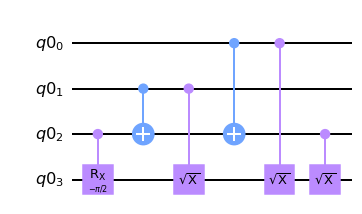

In [4]:
qfs_template.draw("mpl")

In [5]:
qfs = qfs_template.to_gate(label = "quantum half substractor")

## Quantum Full Substractor Experiment

In [6]:
# create experimental circuit
qfs_exp_qr = QuantumRegister(4)
qfs_exp_cr = ClassicalRegister(4)
qfs_exp = QuantumCircuit(qfs_exp_qr,qfs_exp_cr)

In [7]:
# initial conditions 
qfs_exp.x(qfs_exp_qr[1])
qfs_exp.barrier()

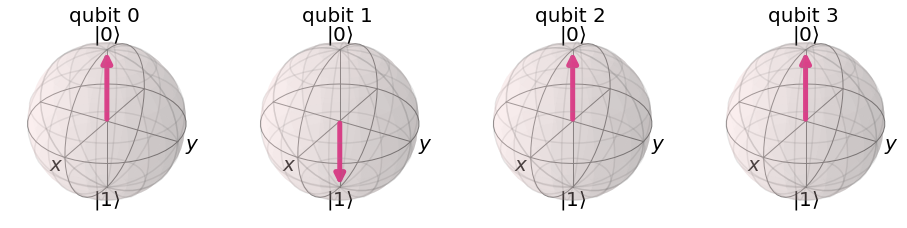

In [8]:
plot_bloch_multivector(execute(qfs_exp,backend).result().get_statevector())

In [9]:
# apply the quantum substractor
qfs_exp.append(qfs,[qfs_exp_qr[0],qfs_exp_qr[1],qfs_exp_qr[2],qfs_exp_qr[3]])

In [10]:
qfs_exp.barrier()

In [11]:
# masure the quantum circuit
for i in range(2,4):
  qfs_exp.measure(qfs_exp_qr[i],qfs_exp_cr[i])

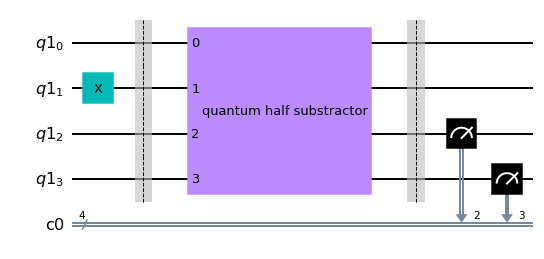

In [12]:
qfs_exp.draw("mpl")

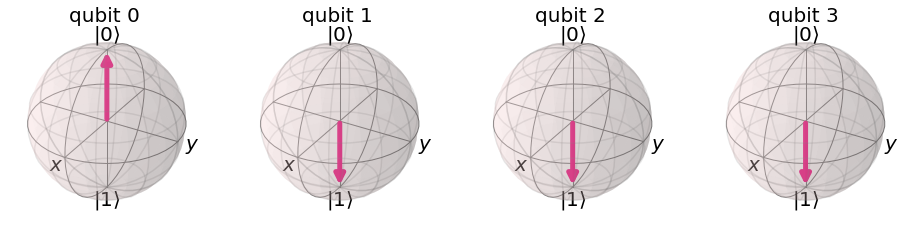

In [13]:
plot_bloch_multivector(execute(qfs_exp,backend).result().get_statevector())

# Quantum Half Substractor

In [14]:
qhs_qr = QuantumRegister(3)
qhs_template = QuantumCircuit(qhs_qr)
qhs_template.crx(-math.pi / 2,qhs_qr[1],qhs_qr[2])
qhs_template.cx(qhs_qr[0],qhs_qr[1])
qhs_template.csx(qhs_qr[0],qhs_qr[2])
qhs_template.csx(qhs_qr[1],qhs_qr[2])

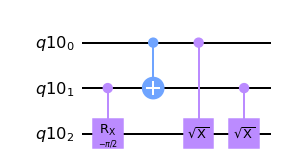

In [15]:
qhs_template.draw("mpl")

In [16]:
qhs = qhs_template.to_gate(label = "quantum half substractor")

In [17]:
# create experimental circuit
qhs_exp_qr = QuantumRegister(3)
qhs_exp_cr = ClassicalRegister(3)
qhs_exp = QuantumCircuit(qhs_exp_qr,qhs_exp_cr)

In [18]:
# initial conditions 
qhs_exp.x(qhs_exp_qr[1])
qhs_exp.barrier()

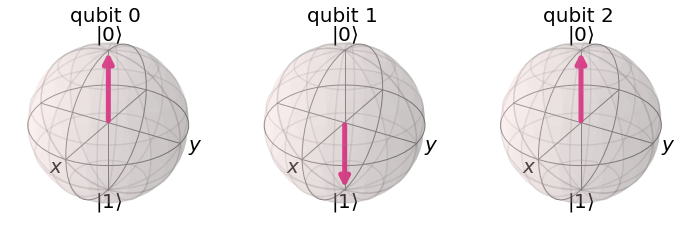

In [19]:
plot_bloch_multivector(execute(qhs_exp,backend).result().get_statevector())

In [20]:
# apply half sbstractor 
qhs_exp.append(qhs,[qhs_exp_qr[0],qhs_exp_qr[1],qhs_exp_qr[2]])

In [21]:
# measurements on the pertinent bits
for i in range(1,3):
  qhs_exp.measure(qhs_exp_qr[i],qhs_exp_cr[i])

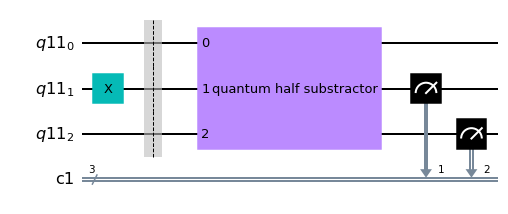

In [23]:
qhs_exp.draw("mpl")

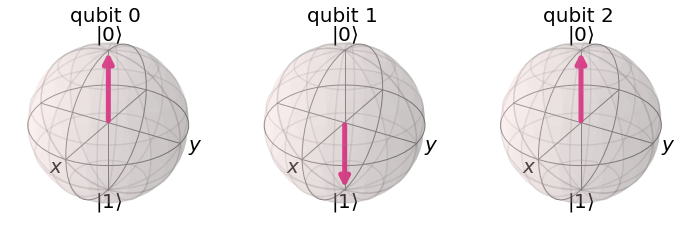

In [22]:
plot_bloch_multivector(execute(qhs_exp,backend).result().get_statevector())